# KDDCUP Data Clean 

2017-5-10

### 录入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta,date,time

In [2]:
%matplotlib inline

In [3]:
# 原始数据
travel_time_data = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/数据提取与合并/travel_time_raw_data.csv')
volume_data = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/数据提取与合并/volume_raw_data.csv')
#travel_time_data = pd.read_csv('travel_time_raw_data_ffill.csv')
#volume_data = pd.read_csv('volume_raw_data_ffill.csv')

### 平均时间数据缺失值，异常值处理 

In [5]:
# 异常样本删除（以平均时间3标准差原则删除异常样本）
def ff(df, column='avg_travel_time'):
    travel_time = df['avg_travel_time']
    mean_value = travel_time.mean()
    std_value = travel_time.std()
    left = mean_value - 5*std_value
    right = mean_value + 5*std_value
    travel_time[travel_time < left] = np.nan
    travel_time[travel_time > right] = np.nan
    df = df.dropna()
    return df

travel_time_data = travel_time_data.groupby('route').apply(ff)

In [7]:
# 异常样本删除（最大的5%的平均时间的样本删除）
def ff(df):
    df = df.sort(['avg_travel_time'], ascending=False)
    num_sample = len(df)
    num_delete = round(0.05 * num_sample)
    return df.iloc[num_delete:]
travel_time_data = travel_time_data.groupby('route').apply(ff)

/home/godcedric/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [9]:
# 删除海平面压力
del travel_time_data['sea_pressure']

In [10]:
# 风向异常值处理，以最近的风向值代替
wind_direction = travel_time_data['wind_direction']

In [11]:
wind_direction[wind_direction > 360] = np.nan

/home/godcedric/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
wind_direction.fillna(method='ffill', inplace=True)

In [6]:
# 以平均值填充缺失值
fill_mean = lambda g:g.fillna(g.mean())

travel_time_data['last_20min'] = travel_time_data.groupby(['route','time'])['last_20min'].apply(fill_mean)
travel_time_data['last_40min'] = travel_time_data.groupby(['route','time'])['last_40min'].apply(fill_mean)
travel_time_data['last_60min'] = travel_time_data.groupby(['route','time'])['last_60min'].apply(fill_mean)
travel_time_data['last_80min'] = travel_time_data.groupby(['route','time'])['last_80min'].apply(fill_mean)
travel_time_data['last_100min'] = travel_time_data.groupby(['route','time'])['last_100min'].apply(fill_mean)
travel_time_data['last_120min'] = travel_time_data.groupby(['route','time'])['last_120min'].apply(fill_mean)

In [6]:
travel_time_data

,intersection_id,tollgate_id,time_window,avg_travel_time,start_time,date,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,time,weekday,route,timemap,holiday
0,A,2,"[2016-07-19 00:00:00,2016-07-19 00:20:00)",58.05,2016-07-19 00:00:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,00:00:00,1,A-2,1,0
1,A,2,"[2016-07-19 00:20:00,2016-07-19 00:40:00)",58.05,2016-07-19 00:20:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,00:20:00,1,A-2,2,0
2,A,2,"[2016-07-19 00:40:00,2016-07-19 01:00:00)",58.05,2016-07-19 00:40:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,00:40:00,1,A-2,3,0
3,A,2,"[2016-07-19 01:00:00,2016-07-19 01:20:00)",58.05,2016-07-19 01:00:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,01:00:00,1,A-2,4,0
4,A,2,"[2016-07-19 01:20:00,2016-07-19 01:40:00)",56.87,2016-07-19 01:20:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,01:20:00,1,A-2,5,0
5,A,2,"[2016-07-19 01:40:00,2016-07-19 02:00:00)",77.74,2016-07-19 01:40:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,01:40:00,1,A-2,6,0
6,A,2,"[2016-07-19 02:00:00,2016-07-19 02:20:00)",77.74,2016-07-19 02:00:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,02:00:00,1,A-2,7,0
7,A,2,"[2016-07-19 02:20:00,2016-07-19 02:40:00)",42.64,2016-07-19 02:20:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,02:20:00,1,A-2,8,0
8,A,2,"[2016-07-19 02:40:00,2016-07-19 03:00:00)",40.17,2016-07-19 02:40:00,2016-07-19,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,02:40:00,1,A-2,9,0
9,A,2,"[2016-07-19 03:00:00,2016-07-19 03:20:00)",40.17,2016-07-19 03:00:00,2016-07-19,1000.5,1005.3,212.0,3.8,31.7,65.0,0.0,03:00:00,1,A-2,10,0


In [13]:
# 最近值填充
ffill = lambda g:g.fillna(method='ffill')
bfill = lambda g:g.fillna(method='bfill')

travel_time_data['last_20min'] = travel_time_data.groupby(['route'])['last_20min'].apply(ffill)
travel_time_data['last_20min'] = travel_time_data.groupby(['route'])['last_20min'].apply(bfill)
travel_time_data['last_40min'] = travel_time_data.groupby(['route'])['last_40min'].apply(ffill)
travel_time_data['last_40min'] = travel_time_data.groupby(['route'])['last_40min'].apply(bfill)
travel_time_data['last_60min'] = travel_time_data.groupby(['route'])['last_60min'].apply(ffill)
travel_time_data['last_60min'] = travel_time_data.groupby(['route'])['last_60min'].apply(bfill)
travel_time_data['last_80min'] = travel_time_data.groupby(['route'])['last_80min'].apply(ffill)
travel_time_data['last_80min'] = travel_time_data.groupby(['route'])['last_80min'].apply(bfill)
travel_time_data['last_100min'] = travel_time_data.groupby(['route'])['last_100min'].apply(ffill)
travel_time_data['last_100min'] = travel_time_data.groupby(['route'])['last_100min'].apply(bfill)
travel_time_data['last_120min'] = travel_time_data.groupby(['route'])['last_120min'].apply(ffill)
travel_time_data['last_120min'] = travel_time_data.groupby(['route'])['last_120min'].apply(bfill)

In [14]:
travel_time_data

intersection_id  tollgate_id  \
route                                      
A-2   8013                A            2   
      8014                A            2   
      8015                A            2   
      8016                A            2   
      8017                A            2   
      8018                A            2   
      8019                A            2   
      8020                A            2   
      8021                A            2   
      8022                A            2   
      8023                A            2   
      8024                A            2   
      8025                A            2   
      8026                A            2   
      8027                A            2   
      8028                A            2   
      8029                A            2   
      8030                A            2   
      8031                A            2   
      8032                A            2   
      8033                A            2   
      8034                A            2   
      8035                A            2   
      8036                A            2   
      8037                A            2   
      8038                A            2   
      8039                A            2   
      8040                A            2   
      8041                A            2   
      8042                A            2   
...                     ...          ...   
C-3   16421               C            3   
      16436               C            3   
      16450               C            3   
      16451               C            3   
      16452               C            3   
      16453               C            3   
      16454               C            3   
      16476               C            3   
      16477               C            3   
      16478               C            3   
      16479               C            3   
      16480               C            3   
      16481               C            3   
      16482               C            3   
      16483               C            3   
      16484               C            3   
      16485               C            3   
      16486               C            3   
      16487               C            3   
      16488               C            3   
      16489               C            3   
      16490               C            3   
      16491               C            3   
      16492               C            3   
      16493               C            3   
      16494               C            3   
      16495               C            3   
      16496               C            3   
      16497               C            3   
      16498               C            3   

                                           time_window  avg_travel_time  \
route                                                                     
A-2   8013   [2016-07-19 05:20:00,2016-07-19 05:40:00)            54.84   
      8014   [2016-07-19 05:40:00,2016-07-19 06:00:00)            58.08   
      8015   [2016-07-19 06:00:00,2016-07-19 06:20:00)            46.36   
      8016   [2016-07-19 06:20:00,2016-07-19 06:40:00)            48.59   
      8017   [2016-07-19 06:40:00,2016-07-19 07:00:00)            66.64   
      8018   [2016-07-19 07:00:00,2016-07-19 07:20:00)            64.68   
      8019   [2016-07-19 07:20:00,2016-07-19 07:40:00)            85.68   
      8020   [2016-07-19 07:40:00,2016-07-19 08:00:00)            58.97   
      8021   [2016-07-19 08:00:00,2016-07-19 08:20:00)            81.60   
      8022   [2016-07-19 08:20:00,2016-07-19 08:40:00)            80.21   
      8023   [2016-07-19 08:40:00,2016-07-19 09:00:00)            63.45   
      8024   [2016-07-19 09:00:00,2016-07-19 09:20:00)            78.05   
      8025   [2016-07-19 09:20:00,2016-07-19 09:40:00)            69.04   
      8026   [2016-07-19 09:40:00,2016-07-19 10:00:00)            69.66   
      8027   [2016-07-19 10:00:00,2016-

In [18]:
dropindex = travel_time_data[travel_time_data['holiday'] == 1].index

In [19]:
travel_time_data = travel_time_data.drop(dropindex, axis=0)

In [20]:
del travel_time_data['holiday']

In [21]:
travel_time_data

,intersection_id,tollgate_id,time_window,avg_travel_time,start_time,date,pressure,sea_pressure,wind_direction,wind_speed,...,time,weekday,route,last_20min,last_40min,last_60min,last_80min,last_100min,last_120min,timemap
0,A,2,"[2016-07-19 00:20:00,2016-07-19 00:40:00)",58.05,2016-07-19 00:20:00,2016-07-19,1000.9,1005.8,219.0,3.3,...,00:20:00,1,A-2,56.87,77.74,56.87,56.87,77.74,77.74,2
1,A,2,"[2016-07-19 01:20:00,2016-07-19 01:40:00)",56.87,2016-07-19 01:20:00,2016-07-19,1000.9,1005.8,219.0,3.3,...,01:20:00,1,A-2,56.87,77.74,56.87,56.87,77.74,77.74,5
2,A,2,"[2016-07-19 01:40:00,2016-07-19 02:00:00)",77.74,2016-07-19 01:40:00,2016-07-19,1000.9,1005.8,219.0,3.3,...,01:40:00,1,A-2,56.87,77.74,56.87,56.87,77.74,77.74,6
3,A,2,"[2016-07-19 02:20:00,2016-07-19 02:40:00)",42.64,2016-07-19 02:20:00,2016-07-19,1000.9,1005.8,219.0,3.3,...,02:20:00,1,A-2,56.87,77.74,56.87,56.87,77.74,77.74,8
4,A,2,"[2016-07-19 02:40:00,2016-07-19 03:00:00)",40.17,2016-07-19 02:40:00,2016-07-19,1000.9,1005.8,219.0,3.3,...,02:40:00,1,A-2,42.64,77.74,77.74,56.87,77.74,77.74,9
5,A,2,"[2016-07-19 03:20:00,2016-07-19 03:40:00)",41.92,2016-07-19 03:20:00,2016-07-19,1000.5,1005.3,212.0,3.8,...,03:20:00,1,A-2,42.64,40.17,42.64,56.87,77.74,77.74,11
6,A,2,"[2016-07-19 03:40:00,2016-07-19 04:00:00)",39.43,2016-07-19 03:40:00,2016-07-19,1000.5,1005.3,212.0,3.8,...,03:40:00,1,A-2,41.92,40.17,40.17,42.64,77.74,77.74,12
7,A,2,"[2016-07-19 04:00:00,2016-07-19 04:20:00)",48.13,2016-07-19 04:00:00,2016-07-19,1000.5,1005.3,212.0,3.8,...,04:00:00,1,A-2,39.43,41.92,40.17,40.17,42.64,77.74,13
8,A,2,"[2016-07-19 04:20:00,2016-07-19 04:40:00)",62.11,2016-07-19 04:20:00,2016-07-19,1000.5,1005.3,212.0,3.8,...,04:20:00,1,A-2,48.13,39.43,41.92,40.17,40.17,42.64,14
9,A,2,"[2016-07-19 04:40:00,2016-07-19 05:00:00)",46.12,2016-07-19 04:40:00,2016-07-19,1000.5,1005.3,212.0,3.8,...,04:40:00,1,A-2,62.11,48.13,39.43,41.92,40.17,40.17,15


In [7]:
# 写出数据
travel_time_data.to_csv('travel_time_data_ffill.csv', index=False)

### 流量数据缺失值，异常值处理 

In [7]:
volume_data.describe()

,tollgate_id,direction,volume,etc,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,weekday,last_20min,last_40min,last_60min,last_80min,last_100min,last_120min,timemap,holiday
count,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,10063.000000,9961.000000,9935.000000,9907.000000,9882.000000,9862.000000,9834.000000,10063.000000,10063.000000
mean,2.000298,0.414290,54.029514,11.963232,1010.930071,1015.927219,8617.052768,2.485342,22.247153,78.953095,0.147292,2.899235,54.539906,54.654353,54.785001,54.896984,54.982154,55.101993,37.288383,0.236411
std,0.910363,0.492623,46.801792,11.346840,3.888292,3.940931,91415.617035,1.287084,3.528380,13.162856,0.570406,2.037314,46.762843,46.762353,46.758334,46.759990,46.764912,46.769353,20.483039,0.424898
min,1.000000,0.000000,1.000000,0.000000,1003.000000,1007.900000,1.000000,0.000000,14.100000,42.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,14.000000,2.000000,1007.500000,1012.500000,46.000000,1.500000,20.000000,69.000000,0.000000,1.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.250000,20.000000,0.000000
50%,2.000000,0.000000,40.000000,9.000000,1011.100000,1016.100000,126.000000,2.300000,21.700000,80.000000,0.000000,3.000000,41.000000,41.000000,41.000000,41.000000,42.000000,42.000000,38.000000,0.000000
75%,3.000000,1.000000,88.000000,19.000000,1014.500000,1019.600000,333.000000,3.100000,24.500000,90.000000,0.000000,5.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,55.000000,0.000000
max,3.000000,1.000000,296.000000,74.000000,1018.400000,1023.500000,999017.000000,7.500000,32.800000,98.000000,5.500000,6.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,72.000000,1.000000


In [9]:
# 删除节假日
dropindex = volume_data[(volume_data['holiday'] == 1) & (volume_data['pair'] != '3-0')].index
volume_data = volume_data.drop(dropindex, axis=0)
dropindex = volume_data[(volume_data['pair'] == '1-0') & (volume_data['date'] == '2016-09-30')].index
volume_data = volume_data.drop(dropindex, axis=0)
del volume_data['holiday']

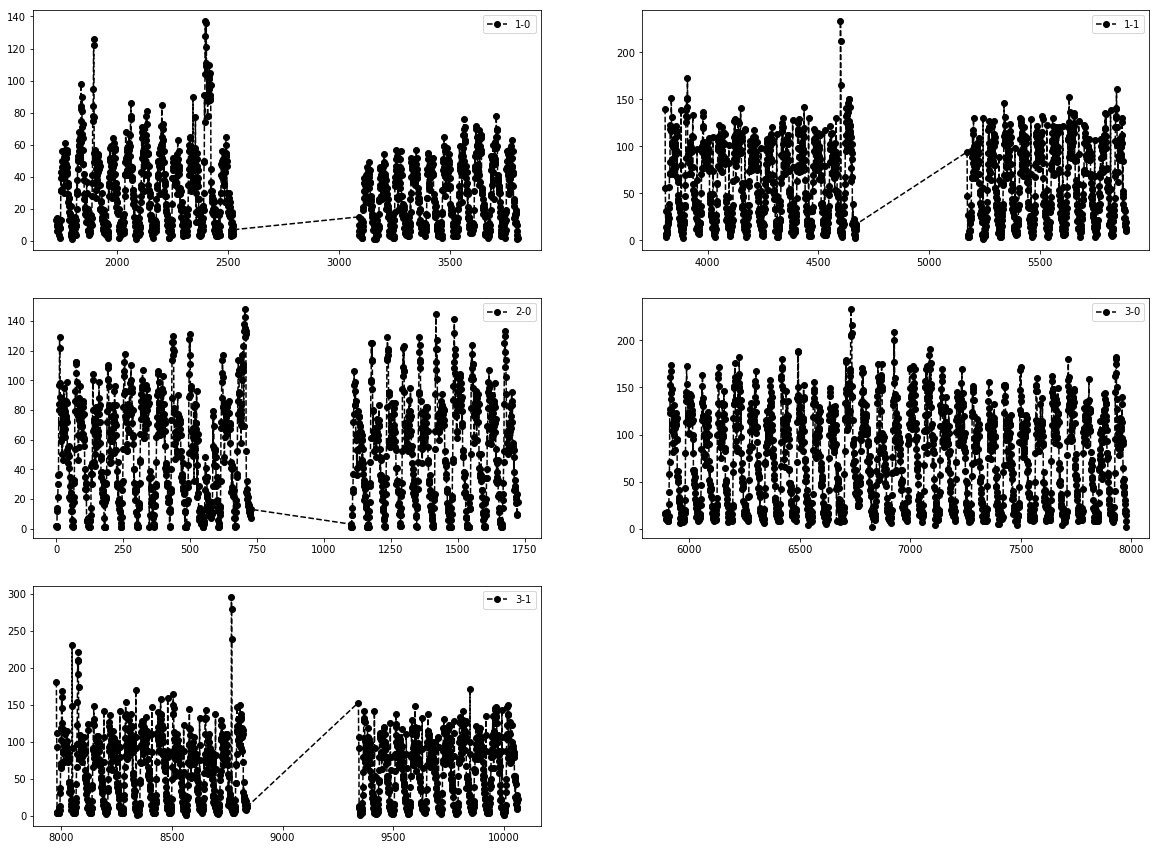

In [10]:
grouped_by_route = volume_data.groupby('pair')
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['volume'],'ko--',label=k1)
    ax.legend()

In [11]:
# 异常样本删除（以平均时间3标准差原则删除异常样本）
def ff(df, column='volume'):
    volume = df['volume']
    mean_value = volume.mean()
    std_value = volume.std()
    left = mean_value - 1*std_value
    right = mean_value + 1*std_value
    volume[volume < left] = np.nan
    volume[volume > right] = np.nan
    df = df.dropna()
    return df
volume_data = volume_data.groupby('pair').apply(ff)

In [ ]:
def ff(df):
    df = df.sort(['volume'], ascending=False)
    num_sample = len(df)
    num_delete = round(0.05 * num_sample)
    return df.iloc[num_delete:]
volume_data = volume_data.groupby('route').apply(ff)

In [12]:
volume_data.describe()

,tollgate_id,direction,volume,etc,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,weekday,last_20min,last_40min,last_60min,last_80min,last_100min,last_120min,timemap
count,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000
mean,2.015766,0.386168,60.124238,13.887114,1011.446773,1016.450452,7952.075258,2.552281,21.755266,78.381333,0.146500,2.820475,62.211898,62.799664,62.987387,64.085348,65.403406,66.768341,42.767711
std,0.916145,0.486921,30.231027,8.682566,3.927986,3.986658,87756.273018,1.343460,3.678407,13.778970,0.563136,2.066528,33.861901,35.679739,37.003589,38.471750,39.865762,40.855164,17.390498
min,1.000000,0.000000,8.000000,0.000000,1003.000000,1007.900000,1.000000,0.000000,14.100000,42.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,34.000000,7.000000,1007.600000,1012.600000,46.000000,1.500000,19.600000,67.000000,0.000000,1.000000,34.000000,33.000000,32.000000,32.000000,31.000000,31.000000,31.000000
50%,2.000000,0.000000,58.000000,13.000000,1012.800000,1017.800000,117.000000,2.400000,21.200000,80.000000,0.000000,3.000000,60.000000,60.000000,60.000000,62.000000,65.000000,67.000000,44.000000
75%,3.000000,1.000000,86.000000,20.000000,1014.500000,1019.600000,333.000000,3.200000,24.400000,91.000000,0.000000,5.000000,89.000000,91.000000,91.000000,93.000000,96.000000,98.000000,58.000000
max,3.000000,1.000000,122.000000,48.000000,1018.400000,1023.500000,999017.000000,7.500000,32.800000,98.000000,5.500000,6.000000,177.000000,231.000000,222.000000,222.000000,222.000000,222.000000,72.000000


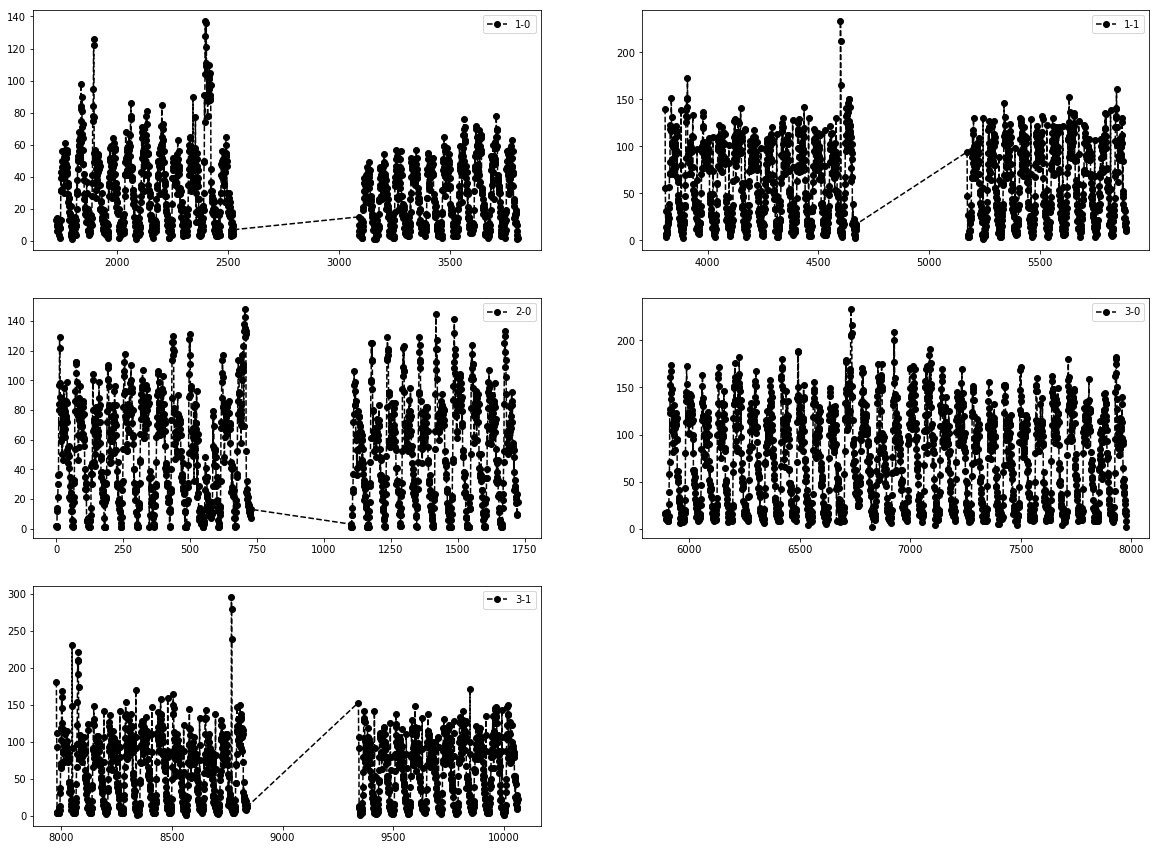

In [13]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(group['volume'],'ko--',label=k1)
    ax.legend()

In [8]:
# 风向异常值处理，以最近的风向值代替
wind_direction = volume_data['wind_direction']

In [9]:
wind_direction[wind_direction > 360] = np.nan

/home/godcedric/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
wind_direction.fillna(method='ffill', inplace=True)

In [15]:
# 以平均值填充缺失值
volume_data['last_20min'] = volume_data.groupby(['pair','time'])['last_20min'].apply(fill_mean)
volume_data['last_40min'] = volume_data.groupby(['pair','time'])['last_40min'].apply(fill_mean)
volume_data['last_60min'] = volume_data.groupby(['pair','time'])['last_60min'].apply(fill_mean)
volume_data['last_80min'] = volume_data.groupby(['pair','time'])['last_80min'].apply(fill_mean)
volume_data['last_100min'] = volume_data.groupby(['pair','time'])['last_100min'].apply(fill_mean)
volume_data['last_120min'] = volume_data.groupby(['pair','time'])['last_120min'].apply(fill_mean)

In [27]:
# 最近值填充
volume_data['last_20min'] = volume_data.groupby(['pair'])['last_20min'].apply(ffill)
volume_data['last_20min'] = volume_data.groupby(['pair'])['last_20min'].apply(bfill)
volume_data['last_40min'] = volume_data.groupby(['pair'])['last_40min'].apply(ffill)
volume_data['last_40min'] = volume_data.groupby(['pair'])['last_40min'].apply(bfill)
volume_data['last_60min'] = volume_data.groupby(['pair'])['last_60min'].apply(ffill)
volume_data['last_60min'] = volume_data.groupby(['pair'])['last_60min'].apply(bfill)
volume_data['last_80min'] = volume_data.groupby(['pair'])['last_80min'].apply(ffill)
volume_data['last_80min'] = volume_data.groupby(['pair'])['last_80min'].apply(bfill)
volume_data['last_100min'] = volume_data.groupby(['pair'])['last_100min'].apply(ffill)
volume_data['last_100min'] = volume_data.groupby(['pair'])['last_100min'].apply(bfill)
volume_data['last_120min'] = volume_data.groupby(['pair'])['last_120min'].apply(ffill)
volume_data['last_120min'] = volume_data.groupby(['pair'])['last_120min'].apply(bfill)

In [11]:
# 写出数据
volume_data.to_csv('volume_data_ffill.csv', index=False)